# I. Librairies

In [4]:
# General imports
import pandas as pd
import numpy as np
import pickle
import matplotlib.pyplot as plt
from tqdm import tqdm

In [5]:
# Import Tensorflow
import tensorflow as tf
print('Tensorflow version:',tf.__version__)
print("Num GPUs Available:", len(tf.config.experimental.list_physical_devices('GPU')))

Tensorflow version: 2.0.0
Num GPUs Available: 0


In [6]:
# Custom file imports
from generalBDDHandler import GeneralBDDHandler
from tables.tablesManager import getMatchId
from eagle_OutputLib import OutputLib
from generalIOLib import FlatInputDic

In [54]:
random_seed = 42

In [56]:
dataframe = pd.read_pickle("./tables/pkl/matches_table.pkl")
dataframe.head()

,winner_id,loser_id,winner_side,download_status,has_crashed
id,,,,,
5155656,98504.0,89272.0,-1.0,False,False
5155383,89272.0,91877.0,-1.0,False,False
5154496,89272.0,98501.0,-1.0,False,False
5152202,89272.0,98495.0,-1.0,False,False
5151230,89272.0,98493.0,-1.0,False,False


In [59]:
dataframe = pd.read_pickle("./tables/pkl/algos_table.pkl")
dataframe.head()

,name,user,matches_list
id,,,
89272,python8 (4),ayxiao,"[5155656, 5155383, 5154496, 5152202, 5151230, ..."
98202,Z01,Hsoleimanii,"[5155512, 5155272, 5155044, 5154771, 5154498, ..."
98439,Python7,AlexanderEzra,"[5138035, 5138032, 5138020, 5138011, 5137995, ..."
98104,Cosmos_Houndv8*,Elliot Bak3r,"[5155735, 5155467, 5155217, 5154943, 5154657, ..."
98114,Cosmos_Houndv8***,Elliot Bak3r,"[5155553, 5155317, 5155164, 5155125, 5155105, ..."


In [60]:
dataframe = pd.read_pickle("./tables/pkl/users_table.pkl")
dataframe.head()

,algos_list
name,
ayxiao,"[89272, 89423, 89785, 89275]"
Hsoleimanii,"[85701, 88734, 91939, 95674, 97948, 98202, 982..."
AlexanderEzra,"[98201, 98208, 98212, 98374, 98418, 98419, 984..."
Elliot Bak3r,"[98083, 98104, 98107, 98114, 98295, 98827, 988..."
n-sanders,"[88157, 88160, 88162, 89151]"


# II. Data

### II.A General IO

In [17]:
general_bdd = GeneralBDDHandler().getBDD()
chosen_eagle = 99748
chosen_match_ids = getMatchId(algo = chosen_eagle)
general_bdd = general_bdd.loc[general_bdd['match_id'].isin(chosen_match_ids)]

print("------------INFO--------------\n")
general_bdd.info()
print("\n-----------COLUMNS------------\n")
print(general_bdd.columns)
general_bdd.head()

------------INFO--------------

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40157 entries, 0 to 265
Data columns (total 12 columns):
match_id      40157 non-null object
flipped       40157 non-null object
image_path    40157 non-null object
image_name    40157 non-null object
p1_health     40157 non-null float64
p1_cores      40157 non-null float64
p1_bits       40157 non-null float64
p2_health     40157 non-null float64
p2_cores      40157 non-null float64
p2_bits       40157 non-null float64
turn          40157 non-null float64
output        40157 non-null object
dtypes: float64(7), object(5)
memory usage: 4.0+ MB

-----------COLUMNS------------

Index(['match_id', 'flipped', 'image_path', 'image_name', 'p1_health',
       'p1_cores', 'p1_bits', 'p2_health', 'p2_cores', 'p2_bits', 'turn',
       'output'],
      dtype='object')


,match_id,flipped,image_path,image_name,p1_health,p1_cores,p1_bits,p2_health,p2_cores,p2_bits,turn,output
0,5369936,True,cnn_images/000/000//000000000,000000000,30.0,40.0,5.0,30.0,40.0,5.0,0.0,1_14_3
1,5369936,True,cnn_images/000/000//000000001,000000001,30.0,36.0,5.0,30.0,40.0,5.0,0.0,0_0_13
2,5369936,True,cnn_images/000/000//000000002,000000002,30.0,35.0,5.0,30.0,40.0,5.0,0.0,0_1_13
3,5369936,True,cnn_images/000/000//000000003,000000003,30.0,34.0,5.0,30.0,40.0,5.0,0.0,0_2_13
4,5369936,True,cnn_images/000/000//000000004,000000004,30.0,33.0,5.0,30.0,40.0,5.0,0.0,0_3_13


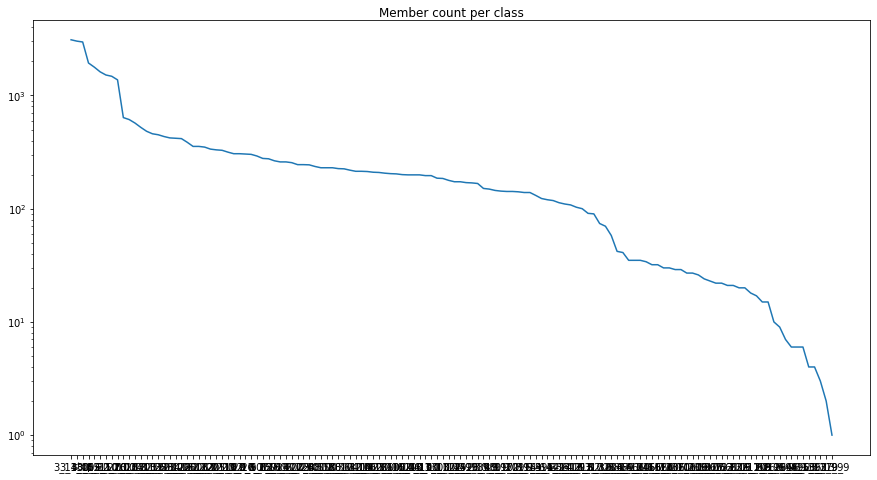

In [18]:
# output class representation

fig = plt.figure(figsize = (15,8))
ax = fig.add_subplot(1,1,1)
ax.set_title('Member count per class', horizontalalignment='center', verticalalignment='top')

ax.plot(general_bdd['output'].value_counts())

ax.set_yscale('log')
plt.show()

### II.B Train/Test/Validation separation

In [44]:
from sklearn.model_selection import train_test_split

In [45]:
inputs = general_bdd[['image_path', 'p1_health', 
                 'p1_cores', 'p1_bits', 'p2_health', 'p2_cores', 'p2_bits', 'turn']].values
outputs = general_bdd['output'].values

improvement: stratify the data, it is impossible for now as some outputs have too few members

In [46]:
X_train, X_validation, y_train, y_validation = train_test_split(inputs, outputs, train_size = 0.8,test_size = 0.2,
                                                            random_state = random_seed, shuffle = True)
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, train_size = 0.8,test_size = 0.2,
                                                            random_state = random_seed, shuffle = True)
print(X_train.shape, X_test.shape, X_validation.shape)

(25700, 8) (6425, 8) (8032, 8)


### II.C Images loading

This take forever so thats why we should find a way to make a tensorflow generator (and also to learn on much more data)

In [47]:
def getImages(X):
    general_bdd_handler = GeneralBDDHandler()
    images_paths = X[:,0]
    images = general_bdd_handler.getImages(images_paths)
    return X[:,1:], images

In [48]:
X_train, images_train = getImages(X_train)
X_test, images_test = getImages(X_test)
X_validation, images_validation = getImages(X_validation)

100%|██████████| 8032/8032 [00:02<00:00, 2681.41it/s]


In [49]:
X_train, X_test, X_validation = X_train.astype('float'), X_test.astype('float'), X_validation.astype('float')
images_train, images_test, images_validation = images_train.astype('float'),  images_test.astype('float') , images_validation.astype('float')

In [50]:
print(X_train.shape, X_test.shape, X_validation.shape)
print(images_train.shape, images_test.shape, images_validation.shape)

(25700, 7) (6425, 7) (8032, 7)
(25700, 15, 29, 7) (6425, 15, 29, 7) (8032, 15, 29, 7)


### II.D Outputs Construction

The outputs construction is pretty fast so that's good (maybe we should use the same "construct on the spot" technic for the inputs)

In [51]:
outputLib = OutputLib([chosen_eagle])

In [52]:
y_train = outputLib.constructOutputs(y_train)
y_test = outputLib.constructOutputs(y_test)
y_validation = outputLib.constructOutputs(y_validation)

25700it [00:00, 781537.89it/s]
6425it [00:00, 683570.59it/s]
8032it [00:00, 594439.15it/s]


In [53]:
print(y_train.shape, y_test.shape, y_validation.shape)

(25700, 132) (6425, 132) (8032, 132)


### II.E Normalisation

In [29]:
images_train = images_train / 255
images_validation = images_validation / 255
images_test = images_test / 255
X_train = X_train / 30
X_validation = X_validation / 30
X_test = X_test / 30

# III Model

In [30]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Input, Dense, Dropout,Flatten, Conv2D, Activation, MaxPooling2D, BatchNormalization,concatenate
from tensorflow.keras.optimizers import Adam

In [31]:
dropout_rate = 0.2

def createMLP(input_dim):
    model = Sequential()
    model.add(Dense(8, input_dim=input_dim, activation="relu"))
    model.add(Dense(8, activation="relu"))
    return model

def createCNN(width, height, depth, filters = (16,32,64)):
    # initialize the input shape and channel dimension, assuming
    # TensorFlow/channels-last ordering
    inputShape = (height, width, depth)
    chanDim = -1

    # define the model input
    inputs = Input(shape=inputShape)

    # loop over the number of filters
    for (i, f) in enumerate(filters):
        # if this is the first CONV layer then set the input
        # appropriately
        if i == 0:
            x = inputs

        # CONV => RELU => BN => POOL
        x = Conv2D(f, (3, 3), padding="same")(x)
        x = Activation("relu")(x)
        #x = BatchNormalization(axis=chanDim)(x)
        x = MaxPooling2D(pool_size=(2,2 ),padding="same")(x)
        x = Dropout(dropout_rate)(x)

    # flatten the volume, then FC => RELU => BN => DROPOUT
    x = Flatten()(x)
    x = Activation("relu")(x)
    x = Dropout(dropout_rate)(x)

    # construct the CNN
    model = Model(inputs, x)

    # return the CNN
    return model

In [38]:
mlp = createMLP(FlatInputDic().index)
cnn = createCNN(29,15,7, filters = (16,32,64))

combinedInput = concatenate([mlp.output, cnn.output])
x = Dense(outputLib.index, activation="relu")(combinedInput)
x = Dropout(dropout_rate)(x)
x = Dense(outputLib.index)(x)
x = Activation('softmax')(x)

model = Model(inputs=[mlp.input, cnn.input], outputs=x)
opt = Adam(lr=1e-3) #decay=1e-3 / 200
model.compile(loss="categorical_crossentropy", metrics =['accuracy'], optimizer=opt)

In [39]:
from tensorflow.keras.utils import plot_model
plot_model(model,show_shapes = True, to_file='model.png')
model.summary()

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.
Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 15, 29, 7)]  0                                            
__________________________________________________________________________________________________
conv2d_6 (Conv2D)               (None, 15, 29, 16)   1024        input_3[0][0]                    
__________________________________________________________________________________________________
activation_9 (Activation)       (None, 15, 29, 16)   0           conv2d_6[0][0]                   
__________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)  (None, 8, 15, 16)    0           activation_9[0][0]               
______

# IV Training

For the training, I have always done it "by hand", it could be worth to look into TensorBoard

In [40]:
train_acc_list = []
train_loss_list = []
validation_acc_list = []
validation_loss_list = []

In [41]:
n_epochs = 200
for i in range(n_epochs):
    
    history = model.fit([X_train, images_train],y_train,validation_data=[[X_validation, images_validation], y_validation], batch_size=1024, epochs=1, verbose = 0)
    train_loss, train_acc, validation_loss, validation_acc = [h[0] for h in history.history.values()]
    
    
    train_acc_list.append(train_acc)
    train_loss_list.append(train_loss)
    validation_acc_list.append(validation_acc)
    validation_loss_list.append(validation_loss)
    print('{}: accuracy: {:.3f} {:.3f}, loss: {:.3f} {:.3f}'.format(i,train_acc, validation_acc, train_loss, validation_loss))

0: accuracy: 0.065 0.078, loss: 4.404 4.094
1: accuracy: 0.075 0.106, loss: 4.089 4.031
2: accuracy: 0.093 0.136, loss: 3.952 3.775


KeyboardInterrupt: 

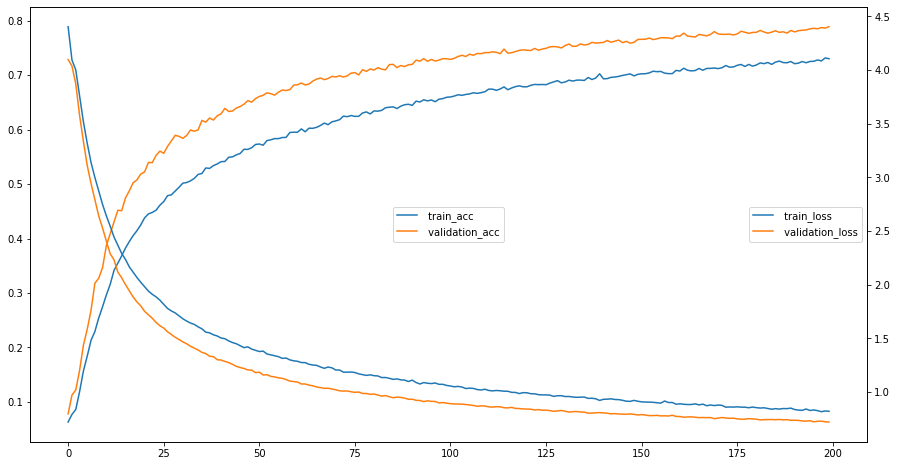

In [62]:
fig = plt.figure(figsize = (15,8))
ax1 = fig.add_subplot(1,1,1)
ax2 = ax1.twinx()

ax1.plot(train_acc_list, label= ' train_acc')
ax1.plot(validation_acc_list, label = ' validation_acc')

ax2.plot(train_loss_list, label = ' train_loss')
ax2.plot(validation_loss_list, label = ' validation_loss')

ax1.legend(loc=10)
ax2.legend(loc=7)
plt.show()

# V Results

In [63]:
from sklearn.metrics import classification_report
train_corr_matrix = np.zeros((outputLib.index, outputLib.index))
validation_corr_matrix = np.zeros((outputLib.index, outputLib.index))
test_corr_matrix = np.zeros((outputLib.index, outputLib.index))

y_true = [np.argmax(y) for y in y_train]
y_pred = model.predict([X_train, images_train])
y_pred = [np.argmax(y) for y in y_pred]
for o1,o2 in zip(y_true,y_pred):
    train_corr_matrix[o1][o2] += 1

    
y_true = [np.argmax(y) for y in y_validation]
y_pred = model.predict([X_validation, images_validation])
y_pred = [np.argmax(y) for y in y_pred]
for o1,o2 in zip(y_true,y_pred):
    validation_corr_matrix[o1][o2] += 1
    
y_true = [np.argmax(y) for y in y_test]
y_pred = model.predict([X_test, images_test])
y_pred = [np.argmax(y) for y in y_pred]
for o1,o2 in zip(y_true,y_pred):
    test_corr_matrix[o1][o2] += 1

In [64]:
def returnDF(corr_matrix):
    df = pd.DataFrame(corr_matrix, columns = outputLib.column_names, index = outputLib.column_names)
    df['total'] = df.apply(sum,axis = 1)
    def divide(row):
        for name in outputLib.column_names:
            row[name] = row[name] / row['total']
        return row
    accuracy = sum([df.iloc[i,i] for i in range(df.shape[0])]) / sum(df['total'])
    df = df.apply(divide,axis = 1)
    
    return df,accuracy

/home/etiennew/anaconda3/envs/tensorflow_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


accuracy 0.8458365758754863


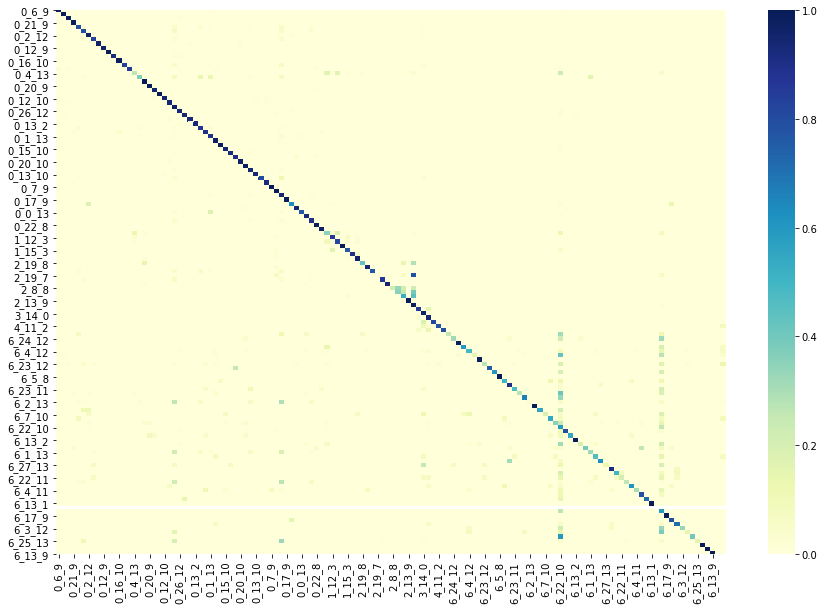

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns
df,accuracy = returnDF(train_corr_matrix)
print("accuracy",accuracy)
ig, ax = plt.subplots(figsize=(15,10))
#print(print(df['total']))
sns.heatmap(df.drop(['total'],axis = 1), ax = ax, cmap="YlGnBu")

/home/etiennew/anaconda3/envs/tensorflow_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


accuracy 0.789093625498008


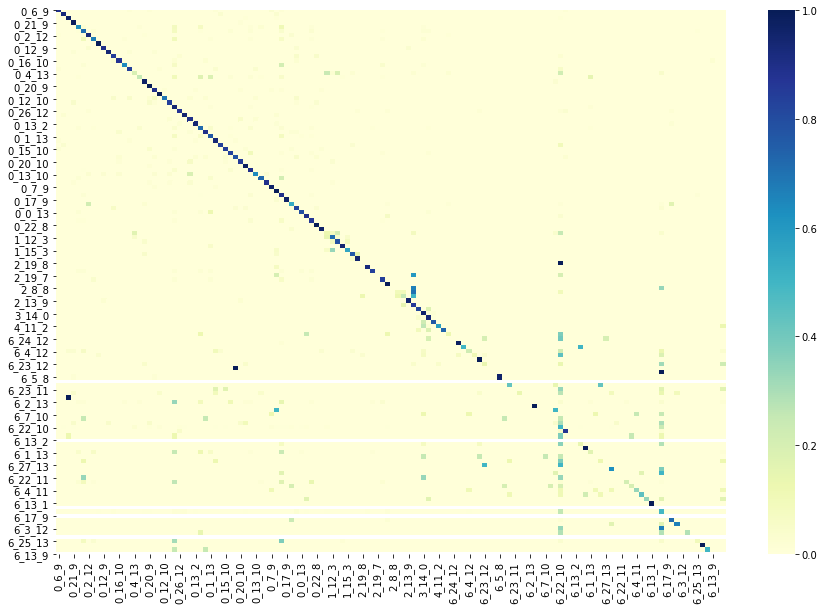

In [66]:
df,accuracy = returnDF(validation_corr_matrix)
print("accuracy",accuracy)
ig, ax = plt.subplots(figsize=(15,10))
#print(print(df['total']))
sns.heatmap(df.drop(['total'],axis = 1), ax = ax, cmap="YlGnBu")

/home/etiennew/anaconda3/envs/tensorflow_gpu/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in double_scalars
  


accuracy 0.7852140077821012


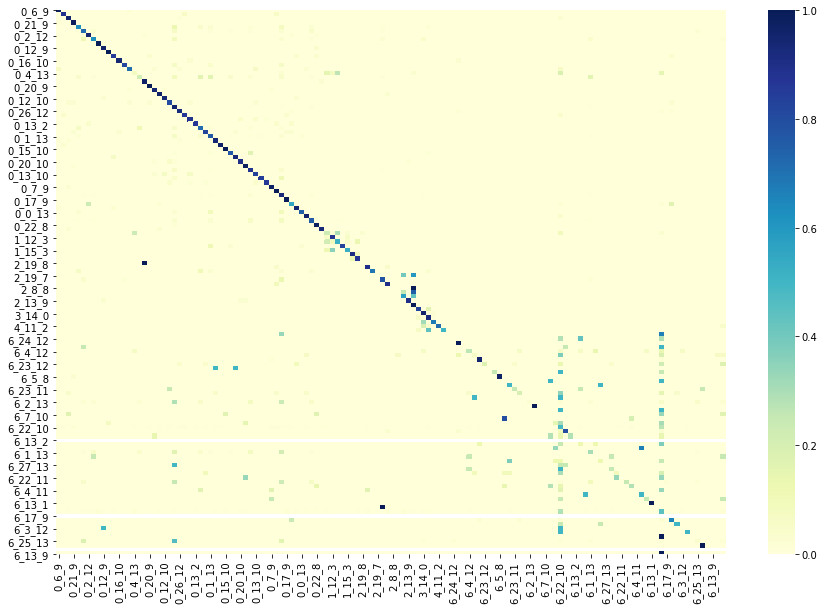

In [67]:
df,accuracy = returnDF(test_corr_matrix)
print("accuracy",accuracy)
ig, ax = plt.subplots(figsize=(15,10))
#print(print(df['total']))
sns.heatmap(df.drop(['total'],axis = 1), ax = ax, cmap="YlGnBu")